In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np


np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

In [2]:
from funcat import *

In [91]:
from funcat.data.tushare_backend import TushareDataBackend

set_data_backend(TushareDataBackend(start_date="2014-07-01"))


S("000001.XSHG")  # 设置当前关注股票
T("2016-06-01")   # 设置当前观察日期

## 基本API

In [100]:
print(O, H, L, C)  # 打印 Open High Low Close

2917.15 2929.08 2909.51 2913.51


In [101]:
C / C[1] - 1  # 当天涨幅

-0.00106630277513

In [102]:
MA(C, 60)  # 打印60日均线

2929.268

In [103]:
C > MA(C, 60)  # 判断收盘价是否大于60日均线

False

In [104]:
HHV(H, 30)  # 30日最高价

3055.69

In [105]:
COUNT(C > MA(C, 60), 30)  # 最近30日，收盘价 Close 大于60日均线的天数

11

In [106]:
CROSS(MA(C, 10), MA(C, 20))  # 10日均线上穿

False

In [107]:
COUNT(C > O, 10)  # 最近10天收阳线的天数

7

In [108]:
HHV(MAX(O, C), 60)  # 最近60天K线实体的最高价

3085.03

In [109]:
CROSS(MA(C, 5), MA(C, 10))  # 5日均线上穿10日均线

False

## 自定义公式

### 0x01 均线金叉死叉

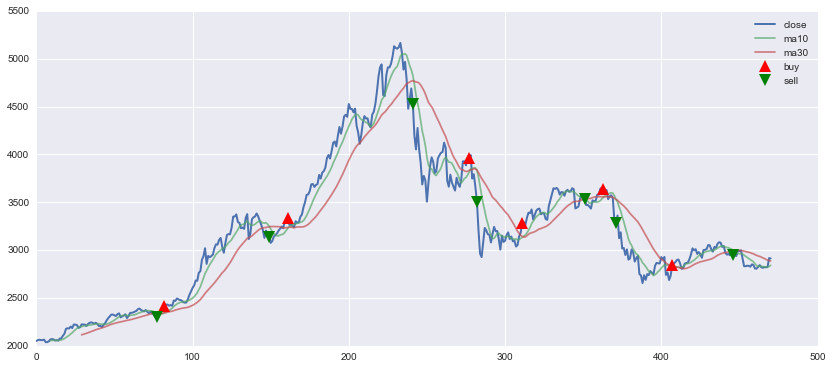

In [144]:
ax = plt.subplot()

ma10 = MA(C, 10)
ma30 = MA(C, 30)
buy_signal = CROSS(ma10, ma30)
sell_signal = CROSS(ma30, ma10)

plt.plot(C.series, label="close", linewidth=2)
plt.plot(ma10.series, label="ma10", alpha=0.7)
plt.plot(ma30.series, label="ma30", alpha=0.7)

plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")

### 0x02 DMA指标（Different of Moving Average）
[DMA指标](http://wiki.mbalib.com/wiki/DMA)。DMA指标（Different of Moving Average）又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。

-97.1932 -112.57508


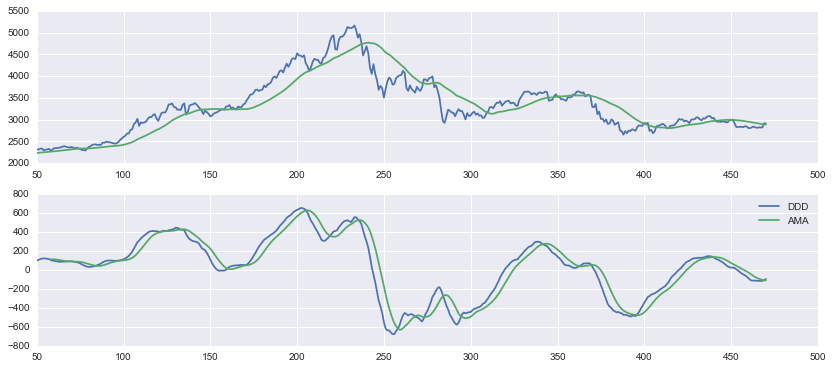

In [145]:
M1 = 10
M2 = 50
M3 = 10

DDD = MA(CLOSE, M1) - MA(CLOSE, M2)
AMA = MA(DDD, M3)

print(DDD, AMA)

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(C.series, label="close")
ax1.plot(MA(C, 30).series, label="ma60")
ax1.set_xlim(50)

ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(50)

plt.legend(loc="best")

## 选股

In [86]:
# 选出涨停股
select(
    lambda : C / C[1] - 1 >= 0.0995,
    start_date=20170104,
	end_date=20170104,
)

lambda : C / C[1] - 1 >= 0.0995,
[20170104]
20170104 000017.XSHE 000017.XSHE[深中华A]
20170104 000026.XSHE 000026.XSHE[飞亚达Ａ]
20170104 000045.XSHE 000045.XSHE[深纺织Ａ]
20170104 000585.XSHE 000585.XSHE[东北电气]
20170104 000595.XSHE 000595.XSHE[宝塔实业]
20170104 000678.XSHE 000678.XSHE[襄阳轴承]
20170104 000695.XSHE 000695.XSHE[滨海能源]
20170104 000710.XSHE 000710.XSHE[天兴仪表]
20170104 000755.XSHE 000755.XSHE[山西三维]
20170104 000885.XSHE 000885.XSHE[同力水泥]
20170104 000959.XSHE 000959.XSHE[首钢股份]
20170104 002245.XSHE 002245.XSHE[澳洋顺昌]
20170104 002297.XSHE 002297.XSHE[博云新材]
20170104 002300.XSHE 002300.XSHE[太阳电缆]
20170104 002461.XSHE 002461.XSHE[珠江啤酒]
20170104 002530.XSHE 002530.XSHE[丰东股份]
20170104 002703.XSHE 002703.XSHE[浙江世宝]
20170104 002709.XSHE 002709.XSHE[天赐材料]
20170104 002738.XSHE 002738.XSHE[中矿资源]
20170104 002833.XSHE 002833.XSHE[弘亚数控]
20170104 002835.XSHE 002835.XSHE[同为股份]
20170104 002836.XSHE 002836.XSHE[新宏泽]
20170104 002837.XSHE 002837.XSHE[英维克]
20170104 600183.XSHG 600183.XSHG[生益科技]
20170104 600189.XSHG 6

In [88]:
# 选出最近30天K线实体最高价最低价差7%以内，最近100天K线实体最高价最低价差25%以内，
# 最近10天，收盘价大于60日均线的天数大于3天
select(
    lambda : (HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07
              and HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25
              and COUNT(C > MA(C, 60), 10) > 3
             ),
    start_date=20170104,
	end_date=20170104,
)

lambda : (HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07
              and HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25
              and COUNT(C > MA(C, 60), 10) > 3
             ),
[20170104]
20170104 600512.XSHG 600512.XSHG[腾达建设]



In [89]:
# 选出最近3天每天的成交量小于20日成交量均线，最近3天最低价低于20日均线，最高价高于20日均线
# 自定义选股回调函数
def callback(date, order_book_id, symbol):
    print("Cool, 在", date, "选出", order_book_id, symbol)


select(
    lambda : (EVERY(V < MA(V, 20) / 2, 3) and EVERY(L < MA(C, 20), 3) and EVERY(H > MA(C, 20), 3)),
    start_date=20170104,
	end_date=20170104,
    callback=callback,
)

lambda : (EVERY(V < MA(V, 20) / 2, 3) and EVERY(L < MA(C, 20), 3) and EVERY(H > MA(C, 20), 3)),
[20170104]
Cool, 在 20170104 选出 002633.XSHE 002633.XSHE[申科股份]
Cool, 在 20170104 选出 600857.XSHG 600857.XSHG[宁波中百]

